In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

In [8]:
ta_data = pd.read_csv('tourist_attractions.csv')

In [9]:
ta_data.head()

,name,type,region,locality,geolocation
0,"The ""second"" home shopping store ""IJ Churin an...",architecture,Amur region,Blagoveshchensk,"(Decimal('127.548877'), Decimal('49.811568'))"
1,"""Town of security officers""",architecture,Sverdlovsk region,Ekaterinburg,"(Decimal('60.621271'), Decimal('56.841798'))"
2,"""Palace for the beloved""",architecture,Kursk region,Safonovka,"(Decimal('35.139965'), Decimal('51.491293'))"
3,"""The House with The Firebird"" (manor Zhelyabov...",architecture,Tomsk region,Tomsk,"(Decimal('85.050946'), Decimal('56.469513'))"
4,"""House with the ghosts""",architecture,Novosibirsk region,Novosibirsk,"(Decimal('82.958761'), Decimal('55.041787'))"


In [10]:
print('The dataset contains {} rows and {} columns'.format(
    ta_data.shape[0],
    ta_data.shape[1]))

The dataset contains 5241 rows and 5 columns


In [11]:
ta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5241 entries, 0 to 5240
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         5241 non-null   object
 1   type         5241 non-null   object
 2   region       5241 non-null   object
 3   locality     4399 non-null   object
 4   geolocation  5241 non-null   object
dtypes: object(5)
memory usage: 204.9+ KB


In [12]:
ta_data.isna().sum().sort_values(ascending=False)

locality       842
name             0
type             0
region           0
geolocation      0
dtype: int64

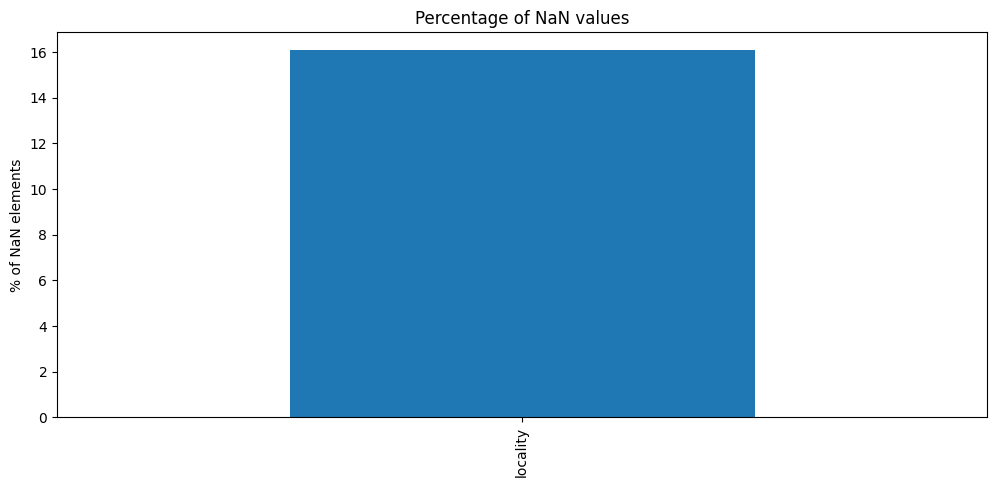

In [15]:
perc_nan = ta_data.isna().sum() / len(ta_data) * 100
ax = perc_nan[perc_nan>=10].sort_values(ascending=False).plot.bar(
    title='Percentage of NaN values',
    figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [17]:
ta_data[ta_data['locality'].isna()]

,name,type,region,locality,geolocation
12,"""School LN Tolstoy's ""in-house on Pyatnitskaya",architecture,Moscow,NaN,Not found
26,Ensemble Rogozhskaya Yamskaya Sloboda,architecture,Moscow,NaN,"(Decimal('37.681173'), Decimal('55.746512'))"
44,triumphal Arch,architecture,Kabardino-Balkar Republic,NaN,"(Decimal('43.408274'), Decimal('43.494396'))"
48,"Archaeological complex ""Gnezdovo""",architecture,Smolensk region,NaN,"(Decimal('31.863863'), Decimal('54.782464'))"
60,The architectural complex Aphids,architecture,Republic of North Ossetia - Alania,NaN,"(Decimal('43.892359'), Decimal('42.666152'))"
...,...,...,...,...,...
5230,"Fort № 3 ""King Friedrich III»",defenses,Kaliningrad region,NaN,Not found
5233,"Fort number 5a ""Lendorf""",defenses,Kaliningrad region,NaN,Not found
5235,"Fort № 9 ""Don '",defenses,Kaliningrad region,NaN,Not found
5238,"Citadel ""Pillai""",defenses,Kaliningrad region,NaN,"(Decimal('19.892177'), Decimal('54.644072'))"


In [19]:
len(ta_data[ta_data['geolocation'] == 'Not found'])

1154

In [27]:
top_regions = ta_data.groupby('region')['name'].count().sort_values(ascending=False).reset_index()
top_regions

,region,name
0,St. Petersburg,246
1,Volgograd region,208
2,Nizhny Novgorod Region,203
3,Sverdlovsk region,180
4,Moscow,170
...,...,...
79,Karachay-Cherkess Republic,9
80,Altai Republic,7
81,Chelyabinsk region,6
82,Sakhalin region,4


In [23]:
matplotlib.rcParams['figure.facecolor']='whitesmoke'

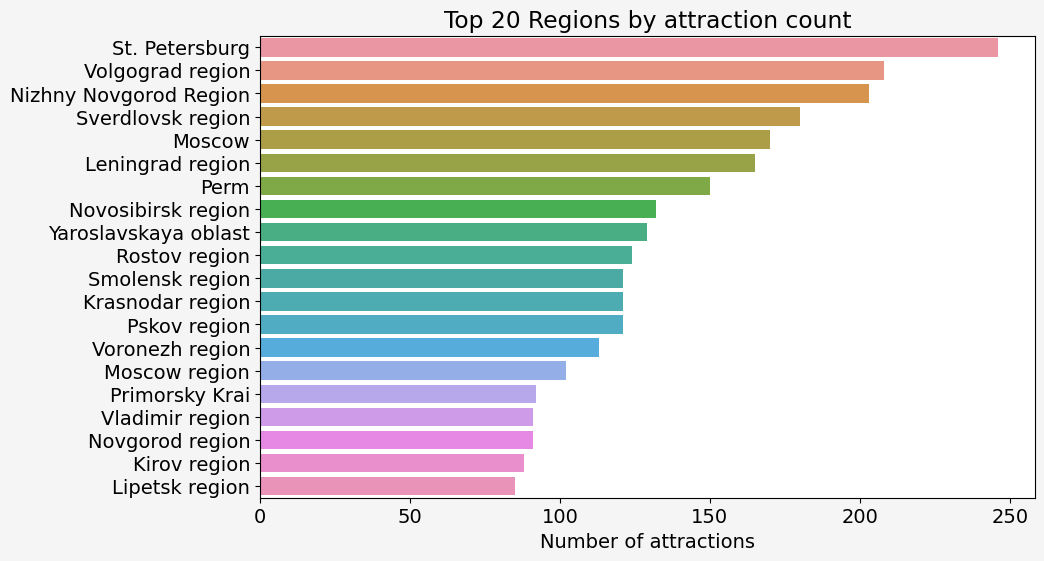

In [31]:
plt.figure(figsize=(10,6))
matplotlib.rcParams['font.size']=14
sns.barplot(x='name', y='region', data=top_regions.head(20))
plt.title('Top 20 Regions by attraction count')
plt.xlabel('Number of attractions')
plt.ylabel('');

In [85]:
ta_data['longitude'] = ta_data['geolocation'].apply(lambda x: float(x.split("'")[1]) if "Decimal" in x else None)
ta_data['latitude'] = ta_data['geolocation'].apply(lambda x: float(x.split("'")[3]) if "Decimal" in x else None)

In [86]:
ta_data_filtered = ta_data[ta_data['latitude'].notna()]

In [87]:
print(ta_data_filtered['latitude'].min(), ta_data_filtered['latitude'].max())

41.381243 75.588603


In [88]:
print(ta_data_filtered['longitude'].min(), ta_data_filtered['longitude'].max())

19.892177 169.782981


In [96]:
fig = px.scatter_mapbox(ta_data_filtered, lat="latitude", lon="longitude",
                        hover_name="name", hover_data=["region"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()